In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


In [49]:
with zipfile.ZipFile("mimic-iii-clinical-database-1.4.zip", 'r') as z:
    with z.open("mimic-iii-clinical-database-1.4/ADMISSIONS.csv.gz") as f1:
        admissions_df = pd.read_csv(f1, compression='gzip')
    with z.open("mimic-iii-clinical-database-1.4/PATIENTS.csv.gz") as f2:
        patients_df = pd.read_csv(f2, compression='gzip')
    with z.open("mimic-iii-clinical-database-1.4/ICUSTAYS.csv.gz") as f3:
        icu_df = pd.read_csv(f3, compression='gzip')
    with z.open("mimic-iii-clinical-database-1.4/LABEVENTS.csv.gz") as f4:
        lab_df = pd.read_csv(f4, compression='gzip')

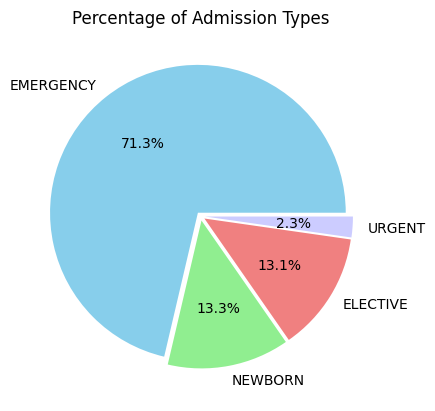

In [50]:
admission_types = admissions_df['ADMISSION_TYPE'].value_counts()

admission_types.plot.pie(explode=[0.03, 0.03, 0.03, 0.03], autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', "#CCCCFF" ])
plt.ylabel('')
plt.title("Percentage of Admission Types")
plt.show()


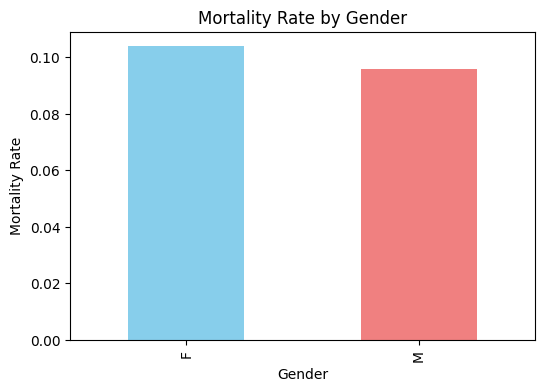

In [51]:
merged_data = pd.merge(admissions_df, patients_df, on='SUBJECT_ID')

# Mortality rate by gender
mortality_by_gender = merged_data.groupby('GENDER')['HOSPITAL_EXPIRE_FLAG'].mean()

plt.figure(figsize=(6, 4))
mortality_by_gender.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Mortality Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Mortality Rate')
plt.show()


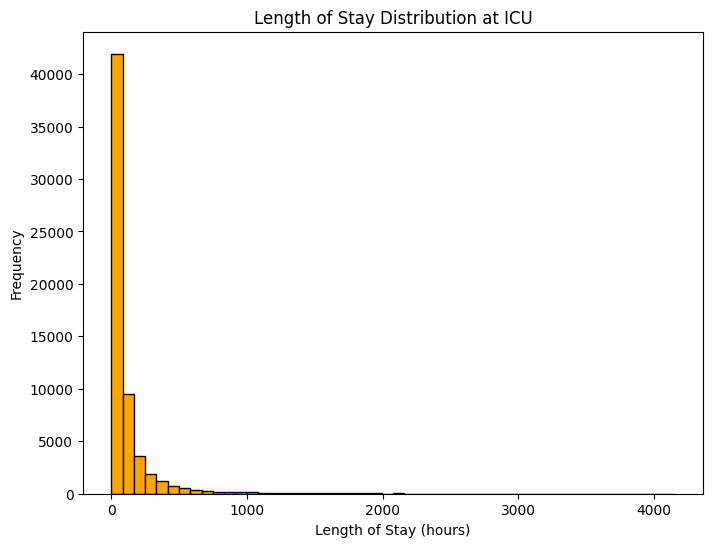

In [52]:
icu_df['INTIME'] = pd.to_datetime(icu_df['INTIME'])
icu_df['OUTTIME'] = pd.to_datetime(icu_df['OUTTIME'])

# Calculate LOS in hours
icu_df['LOS'] = (icu_df['OUTTIME'] - icu_df['INTIME']).dt.total_seconds() / 3600

# LOS distribution
plt.figure(figsize=(8, 6))
plt.hist(icu_df['LOS'], bins=50, color='orange', edgecolor='black')
plt.title('Length of Stay Distribution at ICU')
plt.xlabel('Length of Stay (hours)')
plt.ylabel('Frequency')
plt.show()


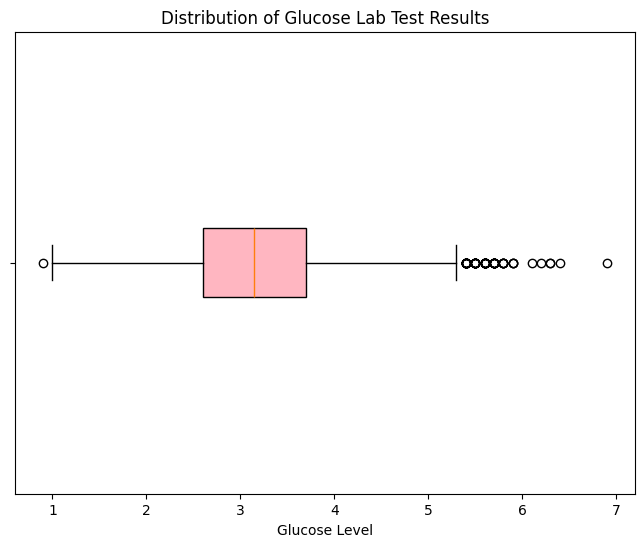

In [53]:

glucose_data = lab_df[lab_df['ITEMID'] == 50862]

plt.figure(figsize=(8, 6))
plt.boxplot(glucose_data['VALUENUM'].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='lightpink'), tick_labels=[""])
plt.title('Distribution of Glucose Lab Test Results')
plt.xlabel('Glucose Level')
plt.show()


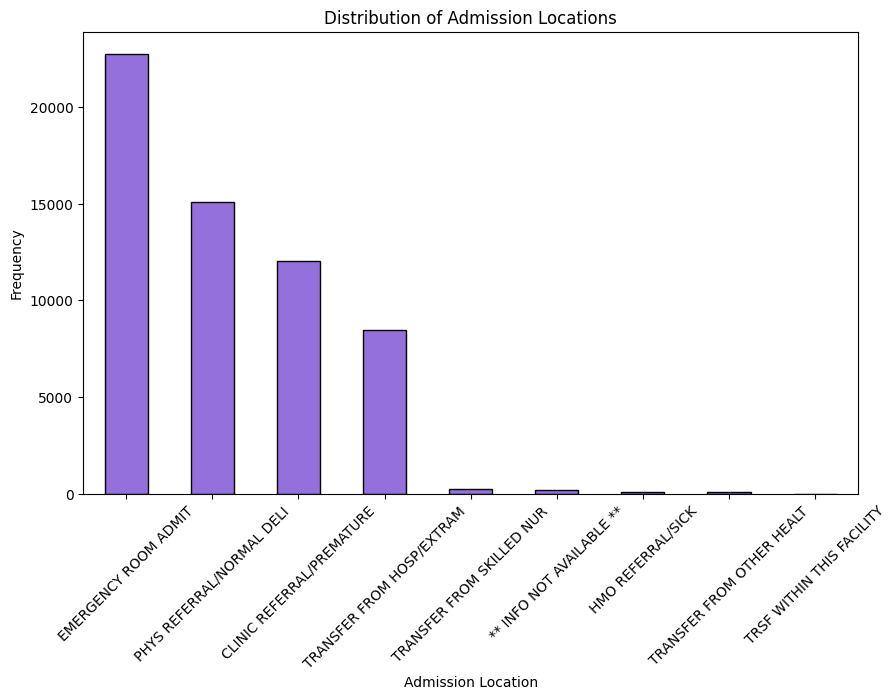

In [54]:


# Count admission locations
admission_locations = admissions_df['ADMISSION_LOCATION'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
admission_locations.plot(kind='bar', color='mediumpurple', edgecolor='black')
plt.title('Distribution of Admission Locations')
plt.xlabel('Admission Location')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()